In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [3]:
df = pd.read_csv('data/train.csv', parse_dates=['date'], index_col='date').dropna()
df

,id,feature_AA,feature_AB,feature_BA,feature_BB,feature_CA,feature_CB,Temperature
date,,,,,,,,
2016-07-01 00:00:00,0,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
2016-07-01 00:15:00,1,5.760,2.076,1.492,0.426,4.264,1.401,30.459999
2016-07-01 00:30:00,2,5.760,1.942,1.492,0.391,4.234,1.310,30.038000
2016-07-01 00:45:00,3,5.760,1.942,1.492,0.426,4.234,1.310,27.013000
2016-07-01 01:00:00,4,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
...,...,...,...,...,...,...,...,...
2018-05-01 22:45:00,64315,12.458,1.407,7.889,-0.746,4.843,1.523,10.622000
2018-05-01 23:00:00,64316,14.200,1.541,9.310,0.284,4.752,1.249,10.482000
2018-05-01 23:15:00,64317,12.659,1.474,7.924,-0.959,4.569,1.310,10.271000


In [6]:
df.index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='15T')
df

,id,feature_AA,feature_AB,feature_BA,feature_BB,feature_CA,feature_CB,Temperature
2016-07-01 00:00:00,0,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
2016-07-01 00:15:00,1,5.760,2.076,1.492,0.426,4.264,1.401,30.459999
2016-07-01 00:30:00,2,5.760,1.942,1.492,0.391,4.234,1.310,30.038000
2016-07-01 00:45:00,3,5.760,1.942,1.492,0.426,4.234,1.310,27.013000
2016-07-01 01:00:00,4,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
...,...,...,...,...,...,...,...,...
2018-05-01 22:45:00,64315,12.458,1.407,7.889,-0.746,4.843,1.523,10.622000
2018-05-01 23:00:00,64316,14.200,1.541,9.310,0.284,4.752,1.249,10.482000
2018-05-01 23:15:00,64317,12.659,1.474,7.924,-0.959,4.569,1.310,10.271000
2018-05-01 23:30:00,64318,13.329,1.541,8.671,-0.533,4.630,1.371,10.341000


In [4]:
df.drop(columns='id', inplace=True)

In [5]:
df

,feature_AA,feature_AB,feature_BA,feature_BB,feature_CA,feature_CB,Temperature
date,,,,,,,
2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
2016-07-01 00:15:00,5.760,2.076,1.492,0.426,4.264,1.401,30.459999
2016-07-01 00:30:00,5.760,1.942,1.492,0.391,4.234,1.310,30.038000
2016-07-01 00:45:00,5.760,1.942,1.492,0.426,4.234,1.310,27.013000
2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
...,...,...,...,...,...,...,...
2018-05-01 22:45:00,12.458,1.407,7.889,-0.746,4.843,1.523,10.622000
2018-05-01 23:00:00,14.200,1.541,9.310,0.284,4.752,1.249,10.482000
2018-05-01 23:15:00,12.659,1.474,7.924,-0.959,4.569,1.310,10.271000


<Axes: xlabel='date'>

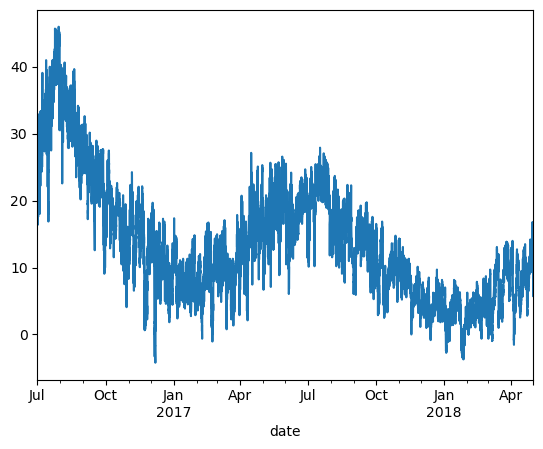

In [6]:
temp = df.Temperature
temp.plot()

In [7]:
adfuller(temp)[1]

0.0012137779642670647

In [8]:
temp

date
2016-07-01 00:00:00    30.531000
2016-07-01 00:15:00    30.459999
2016-07-01 00:30:00    30.038000
2016-07-01 00:45:00    27.013000
2016-07-01 01:00:00    27.787001
                         ...    
2018-05-01 22:45:00    10.622000
2018-05-01 23:00:00    10.482000
2018-05-01 23:15:00    10.271000
2018-05-01 23:30:00    10.341000
2018-05-01 23:45:00    10.833000
Name: Temperature, Length: 64320, dtype: float64

### AR model

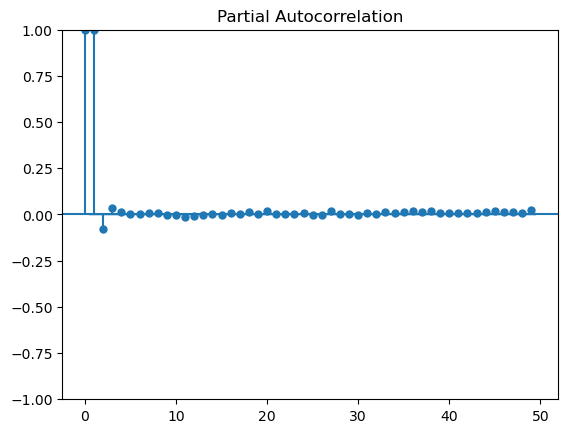

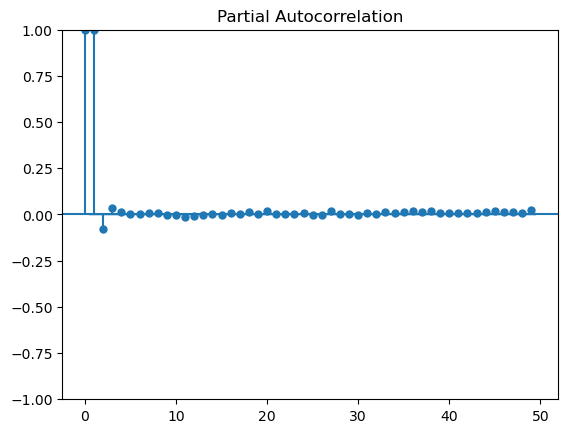

In [11]:
plot_pacf(temp, method='ywm')

In [15]:
ar_model = ARIMA(temp, order=(20, 0, 0))

/home/kuba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/home/kuba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/home/kuba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


In [16]:
ar_model_fit = ar_model.fit()

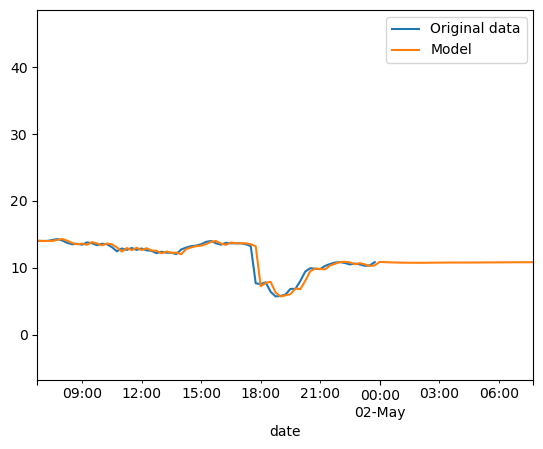

In [17]:
temp.plot(label='Original data')
ar_preds = ar_model_fit.predict(0, 65000)
ar_preds.plot(label='Model')

plt.xlim(ar_preds.index[-750], ar_preds.index[-650])  
# Set the limit based on the range of dates in your predictions

plt.legend()

### MA model

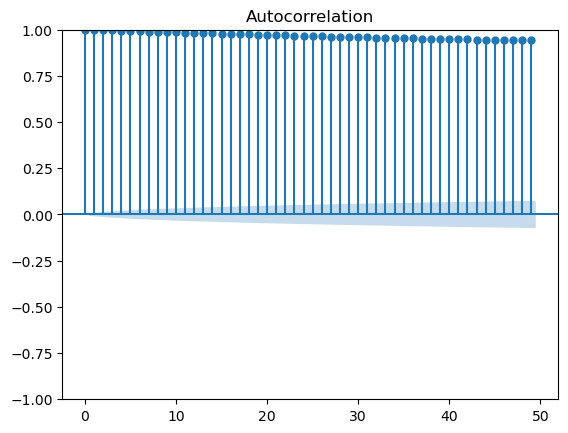

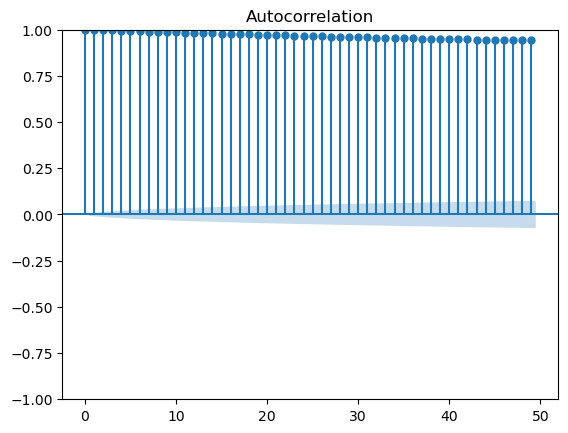

In [12]:
plot_acf(temp)

In [13]:
ma_model = ARIMA(temp, order=(0, 0, 20))
ma_model_fit = ma_model.fit()

/home/kuba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/home/kuba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/home/kuba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/home/kuba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


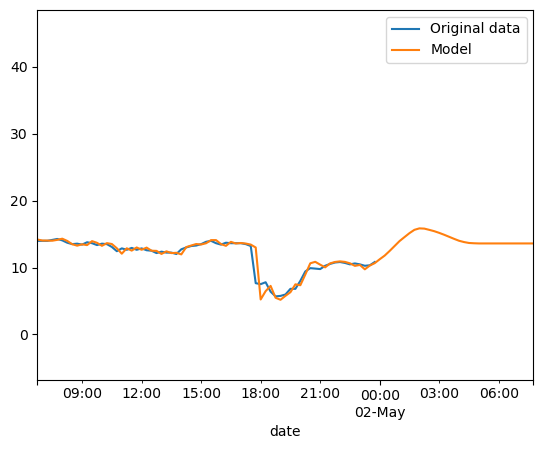

In [16]:
temp.plot(label='Original data')
ma_pred = ma_model_fit.predict(0, 65000)
ma_pred.plot(label='Model')
plt.xlim(ma_pred.index[-750], ma_pred.index[-650])  
plt.legend()

### ARMA model

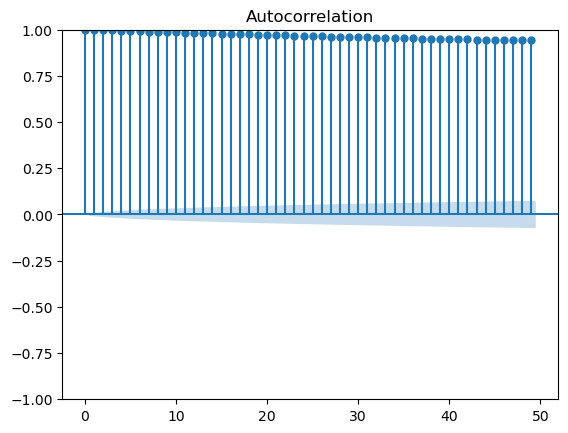

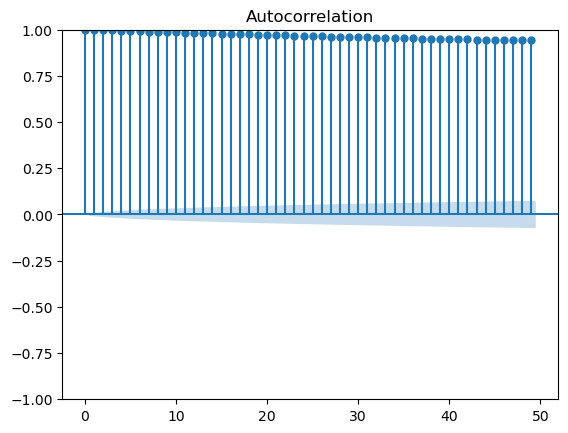

In [9]:
plot_acf(temp)

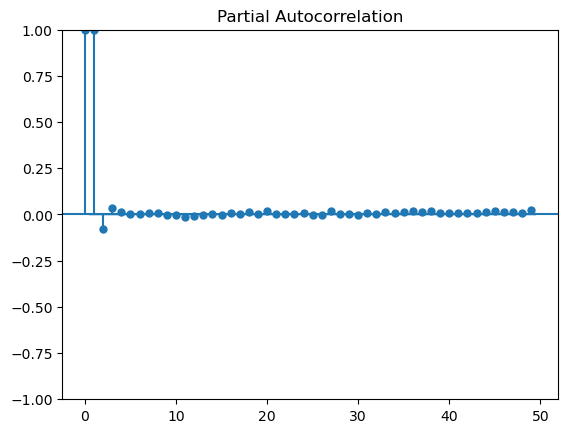

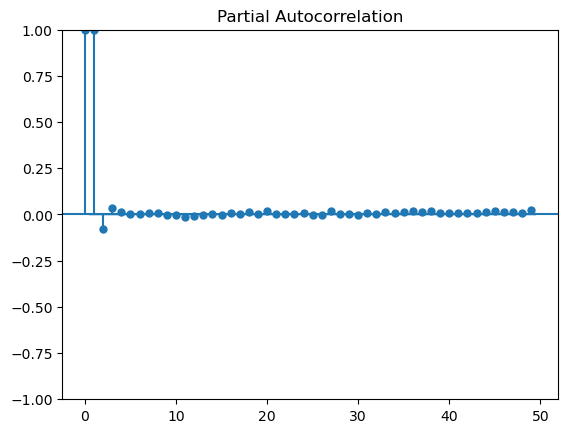

In [10]:
plot_pacf(temp)

In [15]:
arma_model = ARIMA(temp, order=(12, 0, 12))
arma_model_fit = arma_model.fit()

/home/kuba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/home/kuba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/home/kuba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/home/kuba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/kuba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWar

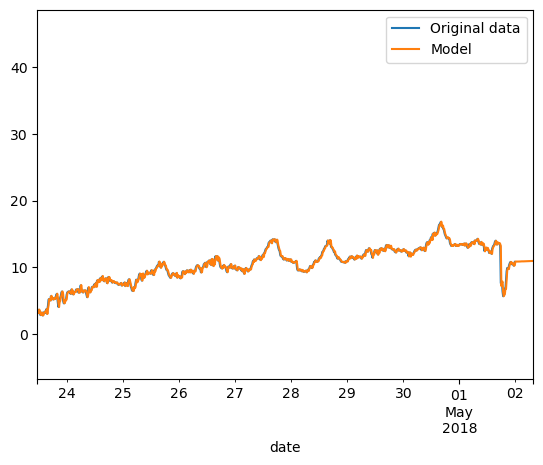

In [18]:
temp.plot(label='Original data')
arma_pred = arma_model_fit.predict(0, 65000)
arma_pred.plot(label='Model')
plt.xlim(arma_pred.index[-1500], arma_pred.index[-650])  
plt.legend()

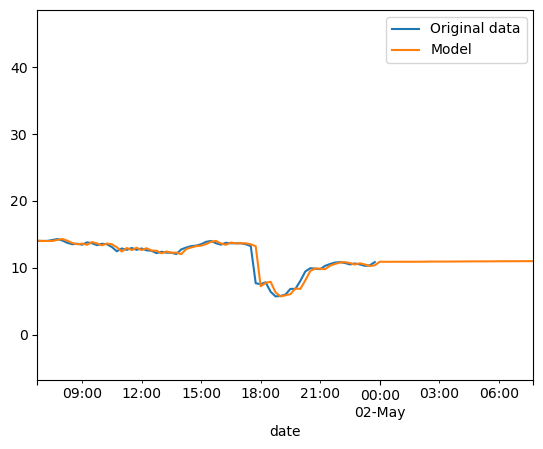

In [17]:
temp.plot(label='Original data')
arma_pred.plot(label='Model')
plt.xlim(arma_pred.index[-750], arma_pred.index[-650])  
plt.legend()

### ARIMA model

In [ ]:
arima_model = ARIMA(temp, order=(40, 1, 40))
arima_model_fit = arima_model.fit()

/home/kuba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/home/kuba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/home/kuba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/home/kuba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/kuba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWar

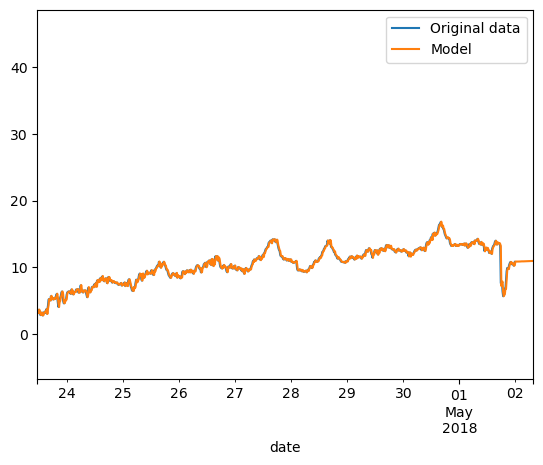

In [20]:
temp.plot(label='Original data')
arma_pred = arma_model_fit.predict(0, 65000)
arma_pred.plot(label='Model')
plt.xlim(arma_pred.index[-1500], arma_pred.index[-650])  
plt.legend()

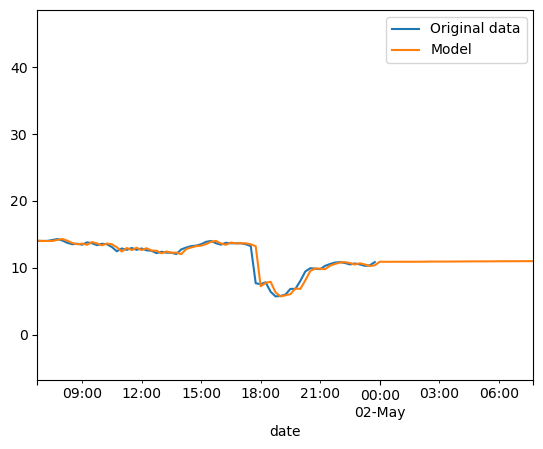

In [21]:
temp.plot(label='Original data')
arma_pred.plot(label='Model')
plt.xlim(arma_pred.index[-750], arma_pred.index[-650])  
plt.legend()

### SARIMAX model

In [10]:
from pmdarima.arima import auto_arima

In [11]:
optimal_model = auto_arima(temp, seasonal=True)
optimal_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                64320
Model:               SARIMAX(1, 1, 2)   Log Likelihood              -40085.506
Date:                Fri, 05 Apr 2024   AIC                          80179.012
Time:                        18:11:56   BIC                          80215.299
Sample:                    07-01-2016   HQIC                         80190.247
                         - 05-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4523      0.054      8.396      0.000       0.347       0.558
ma.L1         -0.3693      0.054     -6.843      0.000      -0.475      -0.264
ma.L2         -0.0674      0.004    -15.471      0.000      -0.076      -0.059
sigma2         0.2036      0.000    550.660      0.000       0.203       0.204
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            787883.99
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                            -1.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
optimal_model.order

(1, 1, 2)

In [13]:
optimal_model.seasonal_order

(0, 0, 0, 0)

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [15]:
sarimax_model = SARIMAX(temp, order=optimal_model.order, seasonal_order=optimal_model.seasonal_order)

fitted_model_sarimax = sarimax_model.fit()

/home/kuba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/home/kuba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.23220D-01    |proj g|=  1.49775D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4      7      1     0     0   1.971D-05   6.232D-01
  F =  0.62321993251703245     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


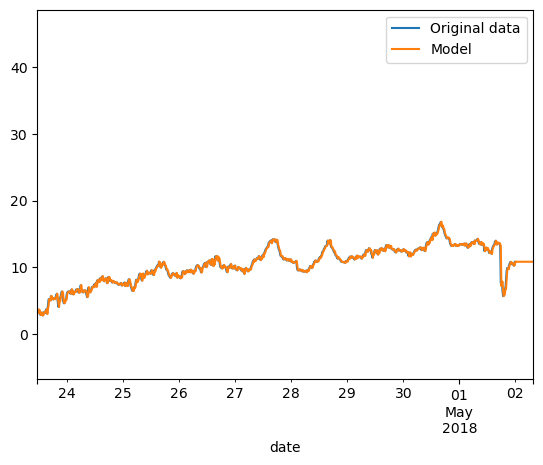

In [16]:
temp.plot(label='Original data')
sarimax_pred = fitted_model_sarimax.predict(0, 65000)
sarimax_pred.plot(label='Model')
plt.xlim(sarimax_pred.index[-1500], sarimax_pred.index[-650])  
plt.legend()

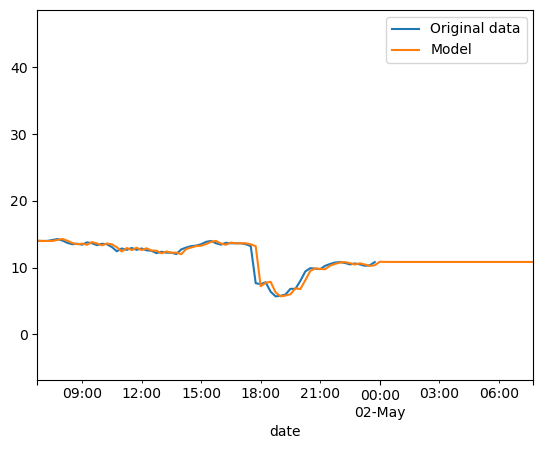

In [18]:
temp.plot(label='Original data')
sarimax_pred.plot(label='Model')
plt.xlim(sarimax_pred.index[-750], sarimax_pred.index[-650])  
plt.legend()

In [19]:
# Every one of those models is usless in predicting